In [8]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot forecast maps with all available models.
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')

from esio import EsioData as ed
from esio import metrics
from esio import ice_plot

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=.8, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#############################################################
# Load in Data
#############################################################
E = ed.EsioData.load()

# Get median ice edge
import timeit
start_time = timeit.default_timer()
ds_81 = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/*.nc', concat_dim='time', autoclose=True) 
print( (timeit.default_timer() - start_time)/60 , " minutes.")
# https://github.com/dask/dask/issues/731

1.0712593721613908  minutes.


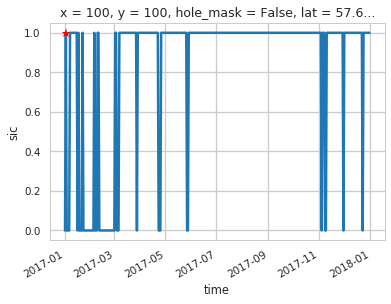

In [3]:
cy = ds_81.sic.sel(time=slice('2017-01-01','2017-12-31'))
oceanPres = cy[:,100,100]<0.15
oceanPres.plot()
IFD = np.argmax(oceanPres)
plt.plot(cy.time.isel(time=IFD.values), 1,'r*')

In [4]:
# Calc observed Ice Free Day
da_IFD = ds_81.sic.groupby('time.year').apply(metrics.calc_IFD)

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less
  return func(*args2)


In [5]:
# Calc_IFD for forecasts (ensemble x init_time x fore_time)


In [6]:
cmap_c = matplotlib.colors.ListedColormap(sns.color_palette("hls", 20))
cmap_c.set_bad(color = 'lightgrey')

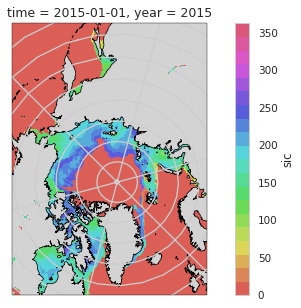

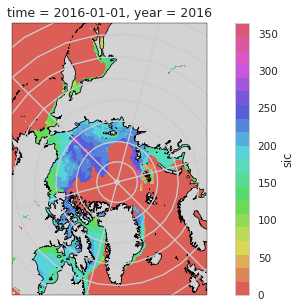

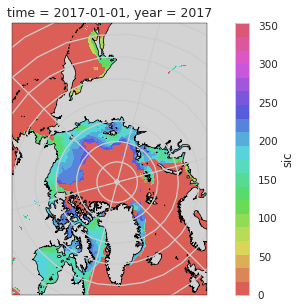

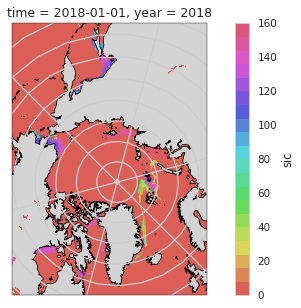

In [9]:
for y in da_IFD.year:
    (f, ax1) = ice_plot.polar_axis()
    f.set_size_inches(10, 5)
    p = da_IFD.sel(year=y).plot(ax=ax1,  x='lon', y='lat', 
                 cmap=cmap_c,
                  transform=ccrs.PlateCarree());

In [ ]:
dir_out = os.path.join(E.obs_dir, 'NSIDC_0081', 'agg_nc')
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [ ]:
da_IFD.to_netcdf(os.path.join(dir_out, 'IFD_FFD.nc'))

In [ ]:
da_IFD = None